In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import tqdm

In [2]:
def read_data(filename):
    with open(filename, "r") as file:
        data = file.read().split()
        node_count = int(data[0])
        K = int(data[1])
        G = nx.Graph()
        positions = []
        stream = (d for d in data[2:])
        for i in range(node_count):
            coords = []
            for j in range(K):
                coords.append(float(next(stream)))
            root = int(next(stream))
            children_count = int(next(stream))
            children = []
            positions.append(coords)
            for j in range(children_count):
                children.append(int(next(stream)))
            G.add_node(i, pos = np.array(coords), root = root, children = children)
            for c in children:
                G.add_edge(i, c)
    return G, np.array(positions)

def calculate_radii(G, root_nodes, leaf_radius = 0.01, n = 1.4):
    def update_children_radius(node):
        if not G.nodes[node]["children"]:
            G.nodes[node]["radius"] = leaf_radius
            return
        temp = 0
        for c in G.nodes[node]["children"]:
            update_children_radius(c)
            temp = temp + G.nodes[c]["radius"]**n
        G.nodes[node]["radius"] = temp**(1 / n)
    for r in root_nodes:
        update_children_radius(r)


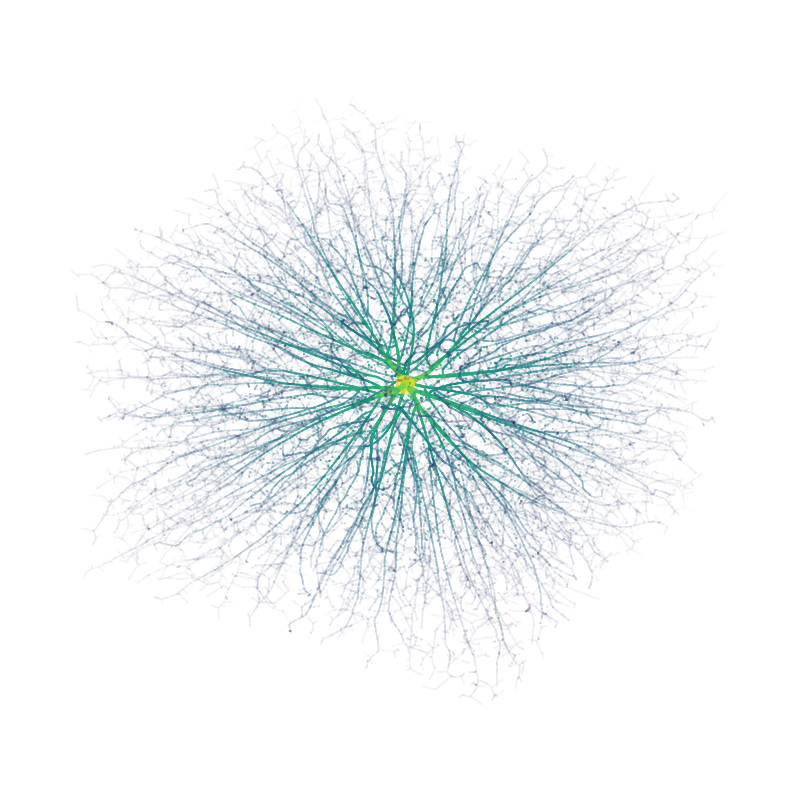

In [4]:
#preview
index = "final"
G, positions = read_data(f"snapshots/snap-{index}.txt")
calculate_radii(G, [0], leaf_radius = 0.0002, n = 0.6)
radii = np.array(list(dict(G.nodes("radius")).values())) * 0.1
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s = radii, c = np.log(radii / np.max(radii)))
ax.grid(visible = False)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_axis_off()

In [3]:
#render
for index in tqdm.tqdm(range(201, 233)):
    G, positions = read_data(f"snapshots/snap-{index}.txt")
    calculate_radii(G, [0], leaf_radius = 0.0002, n = 0.6)
    radii = np.array(list(dict(G.nodes("radius")).values())) * 0.1
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s = radii, c = np.log(radii / np.max(radii)))
    ax.grid(visible = False)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    ax.set_axis_off()
    fig.savefig(f"render/snap-{index}.png", dpi = 200) #results saved to a folder named render, make sure it exists
    plt.close(fig)

100%|█████████████████████████████████████████████████████████████████████████| 32/32 [03:52<00:00,  7.27s/it]
